<a href="https://colab.research.google.com/github/prxska/EDA_FundamentosML_JorgeGarrido/blob/ev/ev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd  # Manejo de datos
import numpy as np  # Cálculos numéricos
import matplotlib.pyplot as plt  # Gráficos
import seaborn as sns  # Visualización avanzada
import io
from scipy.stats import skew, kurtosis

Se hace la importacion de librerias a posterior para su uso

In [6]:
from google.colab import files
uploaded = files.upload()
files = list(uploaded.keys())[0]


Saving data.csv to data (2).csv


In [7]:
df = pd.read_csv(io.BytesIO(uploaded[files]), encoding='latin-1')

En la celda anterior cargue el dataset

In [8]:
categorial_columns = df.select_dtypes(include=['object']).columns # asignacion de variable
numeric_columns = df.select_dtypes(include=['number']).columns # asignacion de variable

In [9]:
numeric_description = df[numeric_columns].describe() # asignacion de variable

In [10]:
categorical_description = df[categorial_columns].describe() # asignacion de variable

In [15]:
numeric_description.head() # se muestra la variables con los primeros

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000


In [16]:
categorical_description.head()

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


En las celdas anteriores asigne la variables para su uso mas practico, y en la ultima celda mostre los primeros datos

In [17]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


Aqui en esta celda muestro el tipo de datos

In [18]:
mean = df[numeric_columns].mean()  # Media
median = df[numeric_columns].median()  # Mediana
mode = df[numeric_columns].mode().iloc[0]  # Moda (solo la primera en caso de múltiples)

# Medidas de dispersión
std_dev = df[numeric_columns].std()  # Desviación estándar
variance = df[numeric_columns].var()  # Varianza
range_vals = df[numeric_columns].max() - df[numeric_columns].min()  # Rango

# Mostrar resultados
mean, median, mode, std_dev, variance, range_vals

(Quantity          9.552250
 UnitPrice         4.611114
 CustomerID    15287.690570
 dtype: float64,
 Quantity          3.00
 UnitPrice         2.08
 CustomerID    15152.00
 dtype: float64,
 Quantity          1.00
 UnitPrice         1.25
 CustomerID    17841.00
 Name: 0, dtype: float64,
 Quantity       218.081158
 UnitPrice       96.759853
 CustomerID    1713.600303
 dtype: float64,
 Quantity      4.755939e+04
 UnitPrice     9.362469e+03
 CustomerID    2.936426e+06
 dtype: float64,
 Quantity      161990.00
 UnitPrice      50032.06
 CustomerID      5941.00
 dtype: float64)

En esta celda se calcula las medidas que son clave, distribucion, tendencia y variabilidad

In [22]:
# Calcular las medidas de tendencia central
mean = df[numeric_columns].mean()  # Media
median = df[numeric_columns].median()  # Mediana
mode = df[numeric_columns].mode().iloc[0]  # Moda (solo la primera en caso de múltiples)

# Calcular las medidas de dispersión
std_dev = df[numeric_columns].std()  # Desviación estándar
variance = df[numeric_columns].var()  # Varianza
range_vals = df[numeric_columns].max() - df[numeric_columns].min()  # Rango

# Crear un DataFrame con los resultados
descriptive_stats = pd.DataFrame({
    'Media': mean,
    'Mediana': median,
    'Moda': mode,
    'Desviación Estándar': std_dev,
    'Varianza': variance,
    'Rango': range_vals
})

# Mostrar los resultados
descriptive_stats

,Media,Mediana,Moda,Desviación Estándar,Varianza,Rango
Quantity,9.552250,3.00,1.00,218.081158,4.755939e+04,161990.00
UnitPrice,4.611114,2.08,1.25,96.759853,9.362469e+03,50032.06
CustomerID,15287.690570,15152.00,17841.00,1713.600303,2.936426e+06,5941.00


En esta celda se esta haciendo el calculo de medida de tendencia central y su dispercion

In [26]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


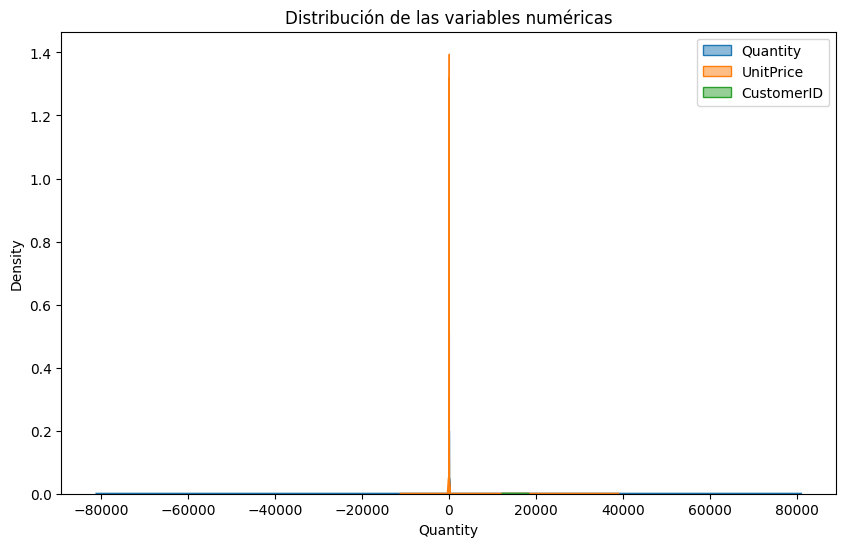

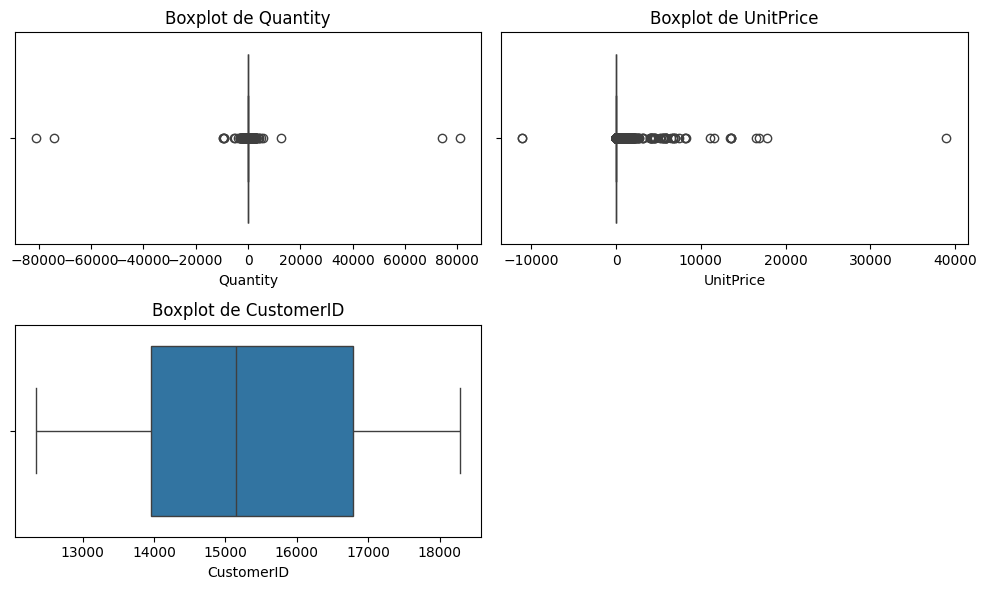

In [32]:
# Graficar histogramas de las variables numéricas

plt.figure(figsize=(10, 6))
for col in numeric_columns:
    sns.histplot(df[col], kde=True, label=col, element='step', stat='density')
plt.legend()
plt.title('Distribución de las variables numéricas')
plt.show()

# Graficar boxplots para las variables numéricas
plt.figure(figsize=(10, 6))
numeric_columns_list = numeric_columns.tolist()
for i, col in enumerate(numeric_columns_list):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

Se grafico Histogramas y grafico de Boxplot con los datos del dataset, para mejorar su visualizacion

In [33]:
# Ver frecuencia de las variables categóricas
for col in categorial_columns:
    print(f"Frecuencia de {col}:")
    print(df[col].value_counts())
    print("\n")

Frecuencia de InvoiceNo:
InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
581483        1
581566        1
C581499       1
C536383       1
C536379       1
Name: count, Length: 25900, dtype: int64


Frecuencia de StockCode:
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
85179a       1
23617        1
90214U       1
47591b       1
72802c       1
Name: count, Length: 4070, dtype: int64


Frecuencia de Description:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
ANT SILVER TURQUOISE BOUDICCA RING       1
Damages                                  1
Found by jackie                          1
water damaged                            1
lost in space                      

En esta celda se ve la frecuencia de las varaibles categoricas

In [34]:
# Identificación de outliers usando IQR
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior para cada columna numérica
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound))

# Mostrar los outliers
outliers_count = outliers.sum()  # Contar la cantidad de outliers por columna
outliers_count


,0
Quantity,58619
UnitPrice,39627
CustomerID,0




Use 3 formas para poder ver anomalias en la informacion. Fundamentos en los cuartiles, identifica los valores lejos de la mayoria. el segundo que use se centra el los valores que estan muy lejos de la media, con el enfoque a la desviacion estandar.